                        count unique       top  freq         mean        std  \
temperature           13200.0    NaN       NaN   NaN    19.127576  17.386327   
humidity              13200.0    NaN       NaN   NaN    68.710833  20.194248   
wind_speed            13200.0    NaN       NaN   NaN     9.832197   6.908704   
precipitation_(%)     13200.0    NaN       NaN   NaN    53.644394  31.946541   
cloud_cover             13200      4  overcast  6090          NaN        NaN   
atmospheric_pressure  13200.0    NaN       NaN   NaN  1005.827896  37.199589   
uv_index              13200.0    NaN       NaN   NaN     4.005758     3.8566   
season                  13200      4    Winter  5610          NaN        NaN   
visibility_(km)       13200.0    NaN       NaN   NaN     5.462917   3.371499   
location                13200      3    inland  4816          NaN        NaN   
weather_type            13200      4     Rainy  3300          NaN        NaN   

                         min    25%    

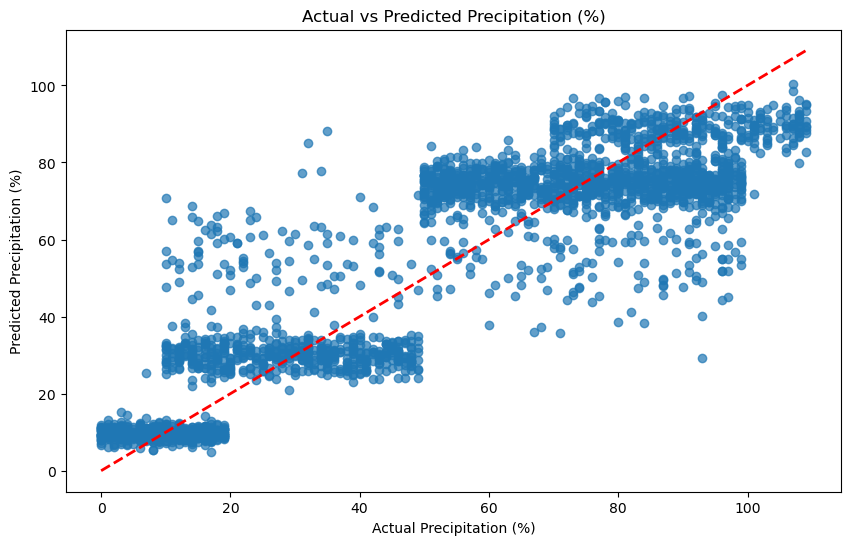

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv('../data/processed/weather_classification_data.csv')

# Explorar los datos
print(df.describe(include='all').T)

# Seleccionar variable objetivo
target = 'precipitation_(%)'

# Preprocesar los datos
# Codificar variables categóricas
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])

# Get categorical columns
#categorical_columns = df.select_dtypes(include='object').columns
# Do dummies for categorical columns
#df = pd.get_dummies(df, columns=categorical_columns)

# Separar características y etiquetas
X = df.drop(target, axis=1)
y = df[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = regressor.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Precipitation (%)')
plt.ylabel('Predicted Precipitation (%)')
plt.title('Actual vs Predicted Precipitation (%)')
plt.show()